# The Schwarzschild Metric

## Introduction

The **Schwarzschild metric** is an exact solution to Einstein's field equations of general relativity. It describes the spacetime geometry outside a spherically symmetric, non-rotating, uncharged mass. This solution, discovered by Karl Schwarzschild in 1916, is fundamental to understanding black holes, gravitational time dilation, and the precession of planetary orbits.

## The Metric Tensor

In Schwarzschild coordinates $(t, r, \theta, \phi)$, the line element is given by:

$$ds^2 = -\left(1 - \frac{r_s}{r}\right)c^2 dt^2 + \left(1 - \frac{r_s}{r}\right)^{-1} dr^2 + r^2 d\Omega^2$$

where $d\Omega^2 = d\theta^2 + \sin^2\theta \, d\phi^2$ is the metric on the unit 2-sphere, and $r_s$ is the **Schwarzschild radius**:

$$r_s = \frac{2GM}{c^2}$$

Here:
- $G$ is Newton's gravitational constant
- $M$ is the mass of the central body
- $c$ is the speed of light

## Key Features

### Metric Components

The metric tensor $g_{\mu\nu}$ in matrix form (for the $(t, r, \theta, \phi)$ coordinates) is:

$$g_{\mu\nu} = \begin{pmatrix} -\left(1 - \frac{r_s}{r}\right) & 0 & 0 & 0 \\ 0 & \left(1 - \frac{r_s}{r}\right)^{-1} & 0 & 0 \\ 0 & 0 & r^2 & 0 \\ 0 & 0 & 0 & r^2\sin^2\theta \end{pmatrix}$$

### Event Horizon

At $r = r_s$, the metric has a **coordinate singularity** (the event horizon). The $g_{tt}$ component vanishes and $g_{rr}$ diverges. This surface marks the boundary from which nothing, not even light, can escape.

### Gravitational Time Dilation

For a stationary observer at radius $r$, proper time $d\tau$ relates to coordinate time $dt$ by:

$$d\tau = \sqrt{1 - \frac{r_s}{r}} \, dt$$

This shows that clocks run slower in stronger gravitational fields.

### Gravitational Redshift

Light emitted at radius $r_e$ and received at $r_r$ experiences a redshift:

$$\frac{\lambda_r}{\lambda_e} = \sqrt{\frac{1 - r_s/r_r}{1 - r_s/r_e}}$$

For $r_r \to \infty$ and $r_e$ near $r_s$, the redshift becomes infinite.

## Computational Analysis

We will visualize several key aspects of the Schwarzschild geometry:

1. The metric components as functions of radial distance
2. Gravitational time dilation factor
3. Embedding diagram of the spatial geometry
4. Effective potential for particle orbits

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Set up plotting style
plt.rcParams['figure.figsize'] = [12, 10]
plt.rcParams['font.size'] = 11
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14

# Physical constants (using geometric units where G = c = 1)
# We'll express everything in units of the Schwarzschild radius
r_s = 1.0  # Schwarzschild radius (normalized)

print("Schwarzschild Metric Analysis")
print("=" * 40)
print(f"Schwarzschild radius r_s = {r_s} (normalized units)")

Schwarzschild Metric Analysis
Schwarzschild radius r_s = 1.0 (normalized units)


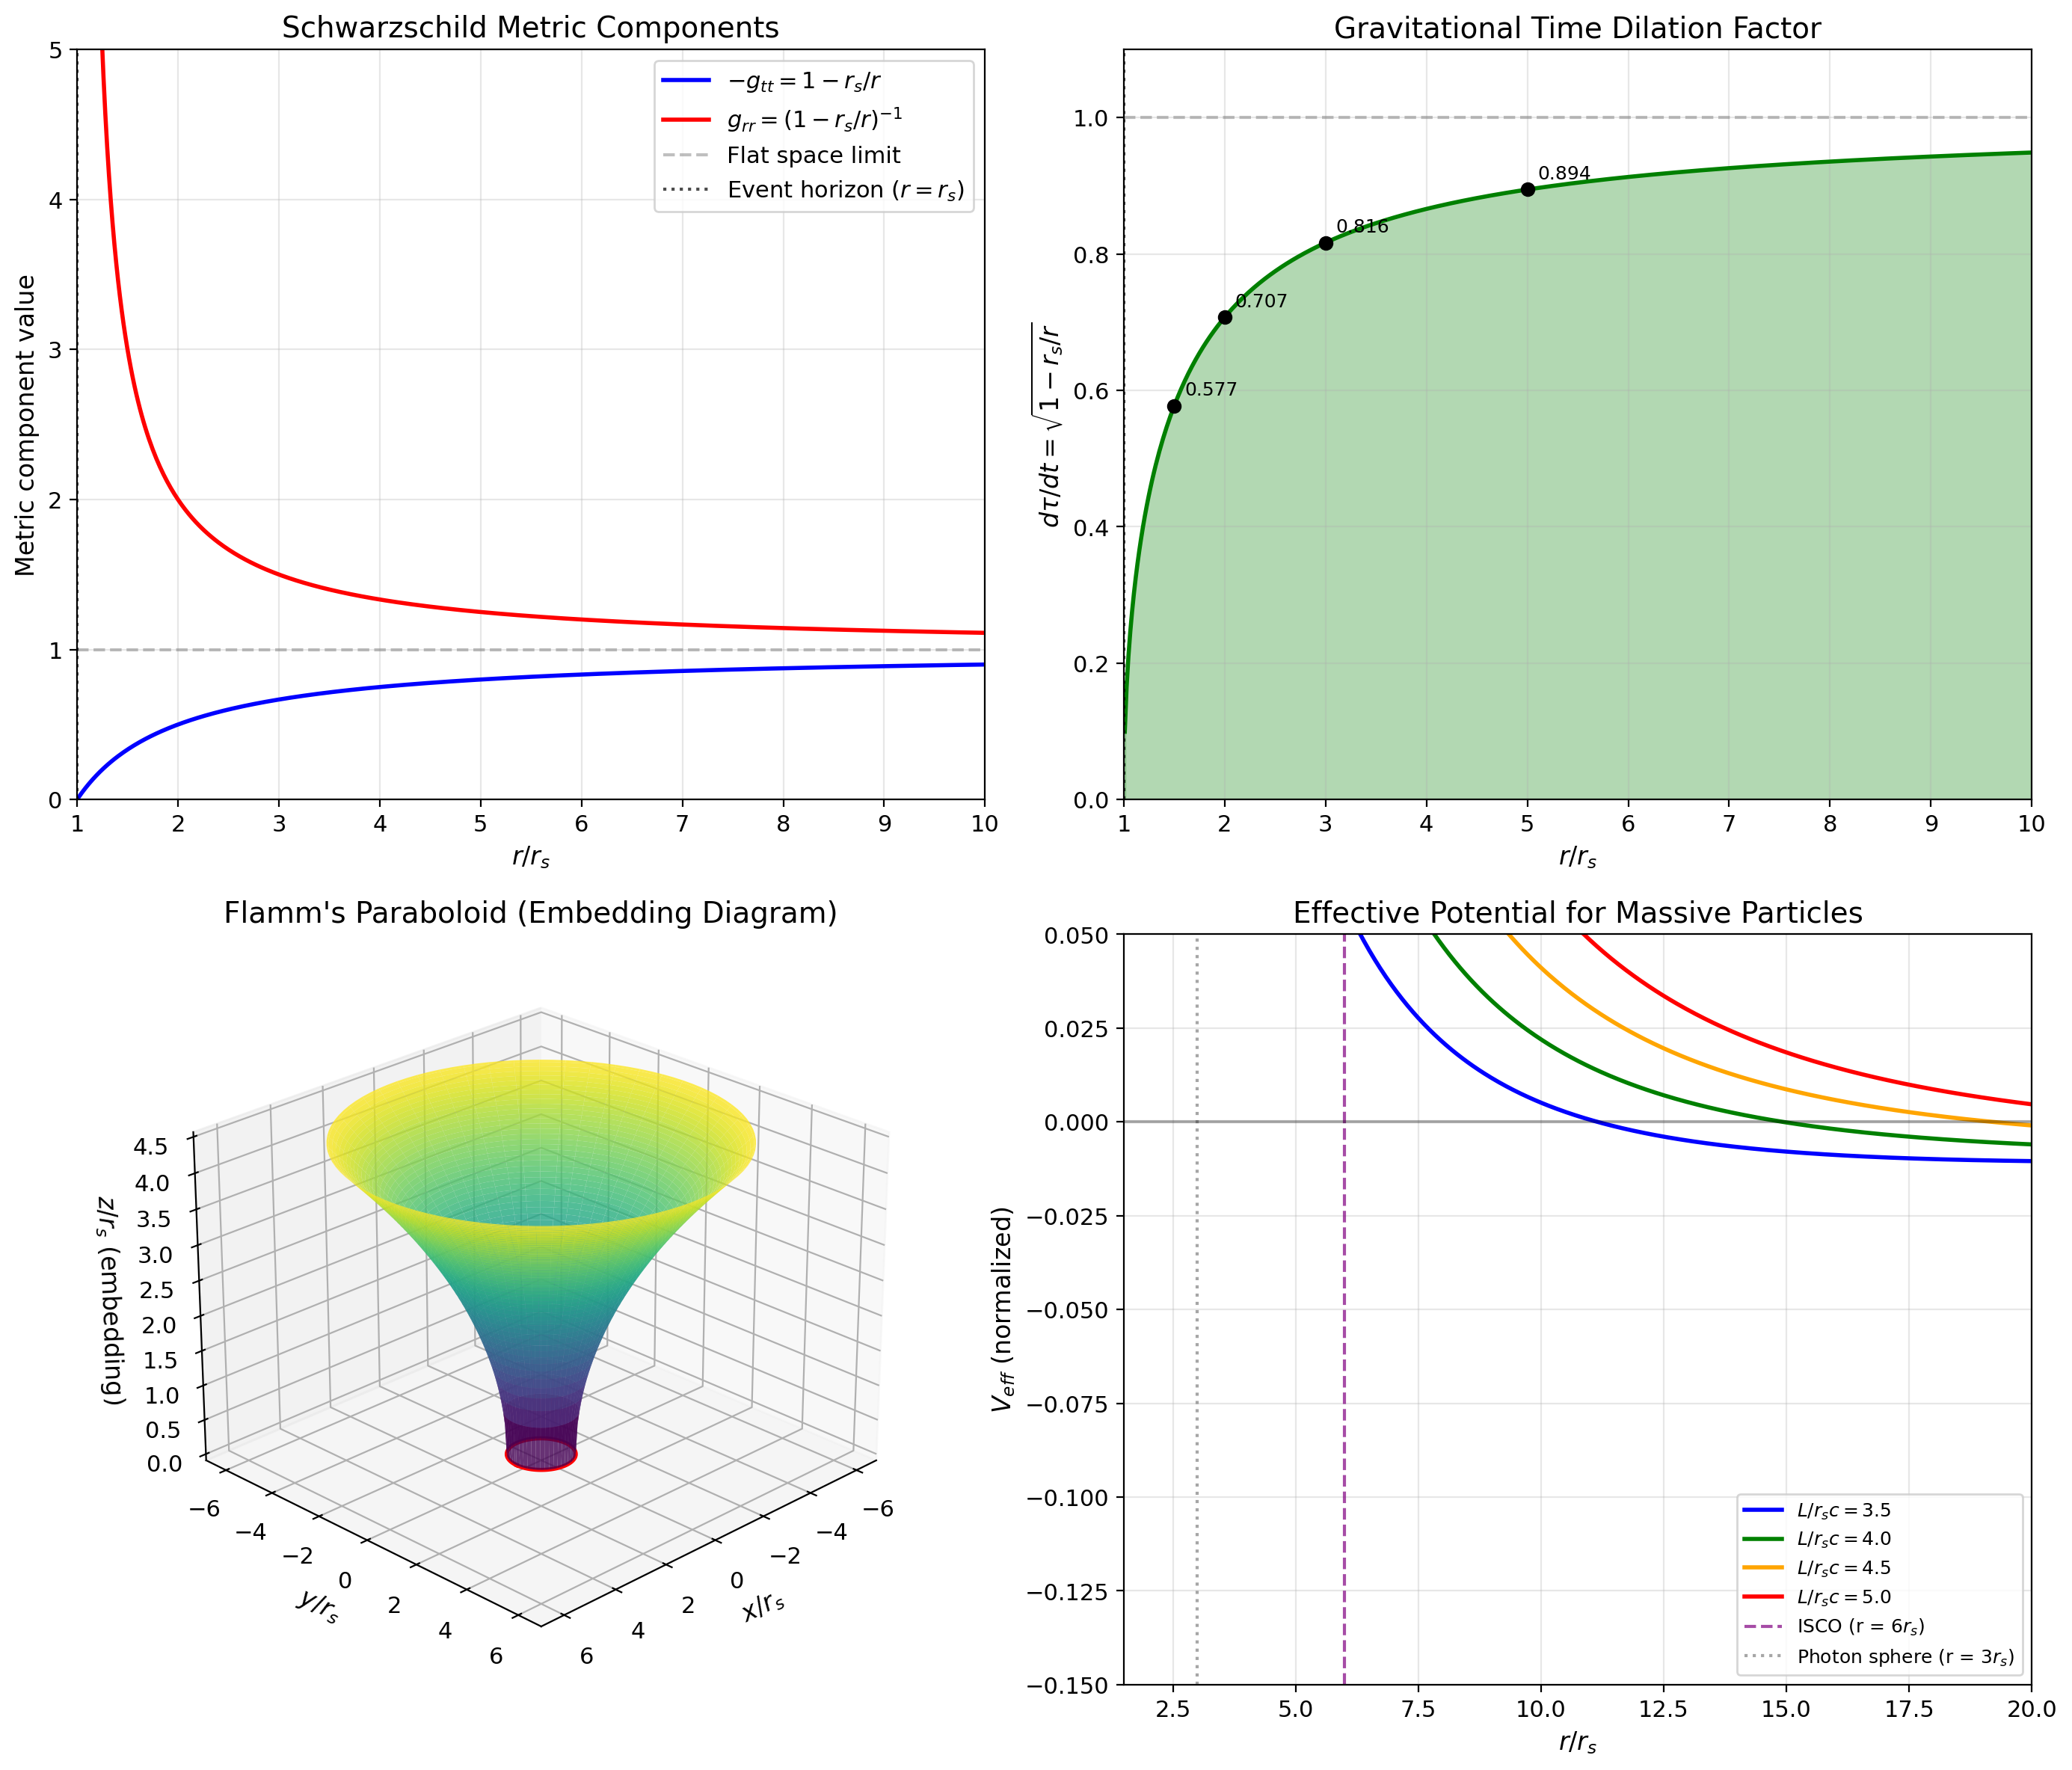


Figure saved to 'plot.png'


In [2]:
# Create figure with multiple subplots
fig = plt.figure(figsize=(14, 12))

# --- Plot 1: Metric Components ---
ax1 = fig.add_subplot(2, 2, 1)

# Radial coordinate (starting just outside event horizon)
r = np.linspace(1.01 * r_s, 10 * r_s, 500)

# Metric components
g_tt = -(1 - r_s/r)  # Time-time component
g_rr = 1/(1 - r_s/r)  # Radial-radial component

ax1.plot(r/r_s, -g_tt, 'b-', linewidth=2, label=r'$-g_{tt} = 1 - r_s/r$')
ax1.plot(r/r_s, g_rr, 'r-', linewidth=2, label=r'$g_{rr} = (1 - r_s/r)^{-1}$')
ax1.axhline(y=1, color='gray', linestyle='--', alpha=0.5, label='Flat space limit')
ax1.axvline(x=1, color='k', linestyle=':', alpha=0.7, label=r'Event horizon ($r = r_s$)')

ax1.set_xlabel(r'$r / r_s$')
ax1.set_ylabel('Metric component value')
ax1.set_title('Schwarzschild Metric Components')
ax1.set_xlim(1, 10)
ax1.set_ylim(0, 5)
ax1.legend(loc='upper right')
ax1.grid(True, alpha=0.3)

# --- Plot 2: Time Dilation Factor ---
ax2 = fig.add_subplot(2, 2, 2)

# Time dilation factor
time_dilation = np.sqrt(1 - r_s/r)

ax2.plot(r/r_s, time_dilation, 'g-', linewidth=2)
ax2.fill_between(r/r_s, 0, time_dilation, alpha=0.3, color='green')
ax2.axvline(x=1, color='k', linestyle=':', alpha=0.7)
ax2.axhline(y=1, color='gray', linestyle='--', alpha=0.5)

# Mark some key values
r_vals = [1.5, 2, 3, 5]
for rv in r_vals:
    td = np.sqrt(1 - r_s/(rv*r_s))
    ax2.plot(rv, td, 'ko', markersize=6)
    ax2.annotate(f'{td:.3f}', (rv, td), textcoords="offset points", 
                 xytext=(5, 5), fontsize=9)

ax2.set_xlabel(r'$r / r_s$')
ax2.set_ylabel(r'$d\tau / dt = \sqrt{1 - r_s/r}$')
ax2.set_title('Gravitational Time Dilation Factor')
ax2.set_xlim(1, 10)
ax2.set_ylim(0, 1.1)
ax2.grid(True, alpha=0.3)

# --- Plot 3: Embedding Diagram ---
ax3 = fig.add_subplot(2, 2, 3, projection='3d')

# For the embedding diagram, we use the Flamm's paraboloid
# z = 2*sqrt(r_s * (r - r_s)) for equatorial slice
r_embed = np.linspace(r_s, 6*r_s, 100)
z_embed = 2 * np.sqrt(r_s * (r_embed - r_s))

# Create surface of revolution
theta_embed = np.linspace(0, 2*np.pi, 100)
R_mesh, Theta_mesh = np.meshgrid(r_embed, theta_embed)
X_mesh = R_mesh * np.cos(Theta_mesh)
Y_mesh = R_mesh * np.sin(Theta_mesh)
Z_mesh = 2 * np.sqrt(r_s * (R_mesh - r_s))

# Plot the surface
ax3.plot_surface(X_mesh/r_s, Y_mesh/r_s, Z_mesh/r_s, 
                 cmap='viridis', alpha=0.8, edgecolor='none')

# Draw the throat circle
theta_circle = np.linspace(0, 2*np.pi, 100)
ax3.plot(np.cos(theta_circle), np.sin(theta_circle), 
         np.zeros_like(theta_circle), 'r-', linewidth=2, label='Event horizon')

ax3.set_xlabel(r'$x / r_s$')
ax3.set_ylabel(r'$y / r_s$')
ax3.set_zlabel(r'$z / r_s$ (embedding)')
ax3.set_title("Flamm's Paraboloid (Embedding Diagram)")
ax3.view_init(elev=25, azim=45)

# --- Plot 4: Effective Potential for Orbits ---
ax4 = fig.add_subplot(2, 2, 4)

# Effective potential for massive particles: 
# V_eff = -r_s/(2r) + L^2/(2r^2) - r_s*L^2/(2r^3)
# where L is angular momentum per unit mass

r_pot = np.linspace(1.5*r_s, 20*r_s, 500)

# Different angular momenta (in units of r_s * c)
L_values = [3.5, 4.0, 4.5, 5.0]
colors = ['blue', 'green', 'orange', 'red']

for L, color in zip(L_values, colors):
    # Effective potential (normalized)
    V_eff = -r_s/(2*r_pot) + (L*r_s)**2/(2*r_pot**2) - r_s*(L*r_s)**2/(2*r_pot**3)
    ax4.plot(r_pot/r_s, V_eff, color=color, linewidth=2, label=f'$L/r_s c = {L}$')

# Mark the ISCO (Innermost Stable Circular Orbit) at r = 6*r_s for Schwarzschild
ax4.axvline(x=6, color='purple', linestyle='--', alpha=0.7, label='ISCO (r = 6$r_s$)')
ax4.axvline(x=3, color='gray', linestyle=':', alpha=0.7, label='Photon sphere (r = 3$r_s$)')
ax4.axhline(y=0, color='k', linestyle='-', alpha=0.3)

ax4.set_xlabel(r'$r / r_s$')
ax4.set_ylabel(r'$V_{eff}$ (normalized)')
ax4.set_title('Effective Potential for Massive Particles')
ax4.set_xlim(1.5, 20)
ax4.set_ylim(-0.15, 0.05)
ax4.legend(loc='lower right', fontsize=9)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('schwarzschild_metric_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nFigure saved to 'plot.png'")

## Analysis of Results

### Metric Components (Upper Left)
The plot shows how $g_{tt}$ and $g_{rr}$ deviate from their flat-space values as we approach the event horizon:
- $-g_{tt} \to 0$ as $r \to r_s$ (time "freezes" at the horizon)
- $g_{rr} \to \infty$ as $r \to r_s$ (radial distances become infinite)
- Both approach unity (flat space) as $r \to \infty$

### Time Dilation (Upper Right)
The factor $\sqrt{1 - r_s/r}$ shows how proper time slows relative to coordinate time:
- At $r = 1.5 r_s$: time runs at ~58% of the rate at infinity
- At $r = 2 r_s$: time runs at ~71% of the rate at infinity
- At $r = 3 r_s$: time runs at ~82% of the rate at infinity

### Embedding Diagram (Lower Left)
Flamm's paraboloid visualizes the spatial curvature of the equatorial plane ($\theta = \pi/2$). The funnel shape represents how radial distances are "stretched" near the mass. Note: this is only a visualization aid—the actual geometry is 3+1 dimensional.

### Effective Potential (Lower Right)
The effective potential determines orbital dynamics:
- **ISCO** (Innermost Stable Circular Orbit) at $r = 6r_s$: the closest stable orbit
- **Photon sphere** at $r = 3r_s$: unstable circular orbits for light
- The potential barrier prevents particles with insufficient energy from escaping
- Higher angular momentum $L$ creates a larger barrier

In [3]:
# Calculate some key physical quantities
print("\nKey Physical Quantities")
print("=" * 40)

# ISCO properties
r_isco = 6 * r_s
E_isco = np.sqrt(8/9)  # Energy per unit mass at ISCO
L_isco = np.sqrt(12) * r_s  # Angular momentum per unit mass at ISCO

print(f"\nInnermost Stable Circular Orbit (ISCO):")
print(f"  Radius: r_ISCO = {r_isco/r_s:.1f} r_s")
print(f"  Binding energy: E/mc² = {E_isco:.4f}")
print(f"  Energy released: {(1-E_isco)*100:.2f}% of rest mass")

# Photon sphere
r_photon = 3 * r_s
print(f"\nPhoton Sphere:")
print(f"  Radius: r_ph = {r_photon/r_s:.1f} r_s")

# Surface gravity (for a black hole)
kappa = 1 / (4 * r_s)  # In units where c = G = 1
print(f"\nSurface Gravity at Event Horizon:")
print(f"  κ = c⁴/(4GM) = 1/(4r_s)")

# Hawking temperature (in natural units)
T_H = kappa / (2 * np.pi)  # T = ℏκ/(2πk_B c)
print(f"\nHawking Temperature (natural units):")
print(f"  T_H = ℏc³/(8πGMk_B) ∝ 1/M")


Key Physical Quantities

Innermost Stable Circular Orbit (ISCO):
  Radius: r_ISCO = 6.0 r_s
  Binding energy: E/mc² = 0.9428
  Energy released: 5.72% of rest mass

Photon Sphere:
  Radius: r_ph = 3.0 r_s

Surface Gravity at Event Horizon:
  κ = c⁴/(4GM) = 1/(4r_s)

Hawking Temperature (natural units):
  T_H = ℏc³/(8πGMk_B) ∝ 1/M


## Conclusions

The Schwarzschild metric reveals several profound features of general relativity:

1. **Spacetime curvature** is encoded in the metric components, which deviate significantly from flat space near massive objects

2. **Time dilation** near massive bodies is a direct consequence of the $g_{tt}$ component—this effect has been confirmed by GPS satellites and precision experiments

3. **The event horizon** at $r = r_s$ represents a one-way causal boundary; the coordinate singularity there can be removed by choosing different coordinates (e.g., Eddington-Finkelstein)

4. **Orbital dynamics** differ fundamentally from Newtonian gravity—the existence of the ISCO and photon sphere are purely relativistic phenomena

5. **Energy extraction** from matter falling into a black hole (up to 5.7% at ISCO) powers some of the most energetic phenomena in the universe, including quasars and X-ray binaries

The Schwarzschild solution remains one of the most important exact solutions in physics, forming the foundation for understanding black holes, gravitational waves, and the strong-field regime of gravity.